In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import black_scholes, MC_option_pricer, european_binomial_tree

# Apply the default theme
sns.set_theme()


steps:  10 option price:  2.8476287574318135 standard error 1.91241572262821 distance from BS 1.9313402944598934
steps:  2030 option price:  4.730544743847776 standard error 0.18439316134924502 distance from BS 0.04842430804393061
steps:  4050 option price:  5.023498147922905 standard error 0.13739992799140202 distance from BS 0.2445290960311981
steps:  6070 option price:  4.712068068018409 standard error 0.10761531112836978 distance from BS 0.0669009838732979
steps:  8090 option price:  4.7835879040064695 standard error 0.09475987623643917 distance from BS 0.004618852114762539
steps:  10110 option price:  4.729798841257021 standard error 0.08402809476860625 distance from BS 0.04917021063468585
steps:  12130 option price:  4.7993338411230235 standard error 0.07729217754190806 distance from BS 0.02036478923131657
steps:  14150 option price:  4.877408310233264 standard error 0.0714351613883133 distance from BS 0.09843925834155698
steps:  16170 option price:  4.779635676610104 standard er

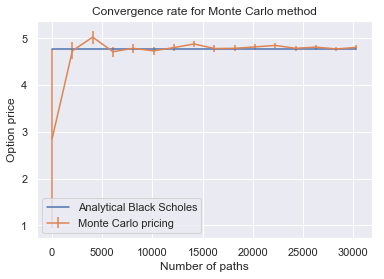

In [46]:
stock_price_T0 = 100
T = 1
r = 0.06
strike_price = 99
#volatility
sigma = 0.2
#different paths to see when it converges
n_paths = 100
different_number_paths = np.linspace(10, 200000, n_paths).astype(int)

seed = 'No'
  
black_scholes_values = black_scholes.putBlackScholes(stock_price_T0,T,r,strike_price,sigma)

stop_paths = n_paths
price_P_different_number_paths = []
std_error_P_different_number_paths = []
for i in range(len(different_number_paths)):
    price_P = MC_option_pricer.putMCPricer(stock_price_T0,strike_price,sigma ,T,r,different_number_paths[i], seed)
    price_P_different_number_paths.append(price_P[0])
    std_error_P = price_P[1]
    std_error_P_different_number_paths.append(std_error_P)
    distance_from_BS = abs(price_P[0] - black_scholes_values)
    print('steps: ',different_number_paths[i], 'option price: ', price_P[0], 'standard error', std_error_P, 'distance from BS', distance_from_BS)
    if std_error_P < 0.05:
        number_paths_converged = different_number_paths[i]
        stop_paths = i
        print('Price option with MC: ', price_P[0], ' With a standard error of: ', price_P[1])
        break   

paths_to_convergence = different_number_paths[:stop_paths+1]

plt.plot(paths_to_convergence,np.ones(len(paths_to_convergence))*black_scholes_values, label='Analytical Black Scholes')
plt.errorbar(paths_to_convergence,price_P_different_number_paths, std_error_P_different_number_paths, label='Monte Carlo pricing')

print(number_paths_converged)
print('BS option vlaue:', black_scholes_values)

#analytical black scholes value


plt.xlabel('Number of paths')
plt.ylabel('Option price')
plt.title('Convergence rate for Monte Carlo method')
plt.legend()
plt.show()

4.781123675595922


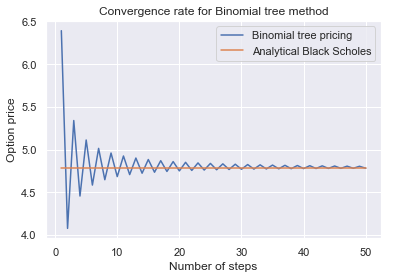

In [47]:
steps_BM = np.arange(1,51)
option_type = "Put" # "Call"

price_P_different_number_steps = []
for step in steps_BM:
    tree = european_binomial_tree.buildTree(stock_price_T0, sigma, T, step)
    # print(tree)
    option_worth=european_binomial_tree.valueEuropeanOptionMatrix(tree, T, r, strike_price,step, sigma, option_type)
    # print(option_worth)
    price_P_different_number_steps.append(option_worth[0][0])

print(price_P_different_number_steps[-1])
steps_to_convergence = steps_BM
plt.plot(steps_to_convergence,price_P_different_number_steps, label='Binomial tree pricing')
#analytical black scholes value
plt.plot(steps_to_convergence,np.ones(len(steps_to_convergence))*black_scholes_values, label='Analytical Black Scholes')
plt.xlabel('Number of steps')
plt.ylabel('Option price')
plt.title('Convergence rate for Binomial tree method')
plt.legend()
plt.show()

In [54]:
#Comparison run time between binomial tree pricing and monte carlo pricing with amount of steps/paths they needed to do to 
#converge to 0.0001 of the analytical black scholes price
import time
start_time1 = time.time()
price_P = MC_option_pricer.putMCPricer(stock_price_T0,strike_price,sigma ,T,r,number_paths_converged, seed)
print("--- %s seconds ---" % (time.time() - start_time1))

start_time2 = time.time()
tree = european_binomial_tree.buildTree(stock_price_T0, sigma, T, stop_step)
option_worth=european_binomial_tree.valueEuropeanOptionMatrix(tree, T, r, strike_price,stop_step, sigma, option_type)
print("--- %s seconds ---" % (time.time() - start_time2))


start_time3 = time.time()
black_scholes_values = black_scholes.putBlackScholes(stock_price_T0,T,r,strike_price,sigma)
print("--- %s seconds ---" % (time.time() - start_time3))


--- 0.682213544845581 seconds ---
--- 0.00238037109375 seconds ---
--- 0.0 seconds ---


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


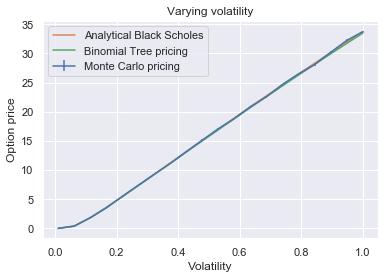

In [49]:
#different volatilities with the number of paths for the MC method and steps for BT method to which they converged to less t
#than 0.01 of BS model
varying_sigma = np.linspace(0.01, 1, 20)
  
MC_price_P_different_sigmas = []
MC_price_P_different_sigmas_std_errors = []
BS_price_P_different_sigmas = []
BT_price_P_different_sigmas = []
for i in range(len(varying_sigma)):
    print(i)
    MC_price_P = MC_option_pricer.putMCPricer(stock_price_T0,strike_price,varying_sigma[i] ,T,r,number_paths_converged, seed)
    BS_price_P = black_scholes.putBlackScholes(stock_price_T0,T,r,strike_price,varying_sigma[i])
    tree = european_binomial_tree.buildTree(stock_price_T0, varying_sigma[i], T, stop_step)
    BT_price_P = european_binomial_tree.valueEuropeanOptionMatrix(tree, T, r, strike_price,stop_step, varying_sigma[i], option_type)
    MC_price_P_different_sigmas.append(MC_price_P[0])
    MC_price_P_different_sigmas_std_errors.append(MC_price_P[1])
    BS_price_P_different_sigmas.append(BS_price_P)
    BT_price_P_different_sigmas.append(BT_price_P[0][0])
    
plt.errorbar(varying_sigma,MC_price_P_different_sigmas, MC_price_P_different_sigmas_std_errors, label='Monte Carlo pricing')
plt.plot(varying_sigma,BS_price_P_different_sigmas, label='Analytical Black Scholes')
plt.plot(varying_sigma,BT_price_P_different_sigmas, label='Binomial Tree pricing')
plt.xlabel('Volatility')
plt.ylabel('Option price')
plt.title('Varying volatility')
plt.legend()
plt.show()

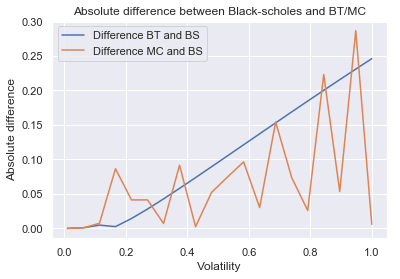

In [50]:
MC_price_P_different_sigmas_array = np.array(MC_price_P_different_sigmas)
BS_price_P_different_sigmas_array = np.array(BS_price_P_different_sigmas)
BT_price_P_different_sigmas_array = np.array(BT_price_P_different_sigmas)

difference_MC_BS = abs(MC_price_P_different_sigmas_array - BS_price_P_different_sigmas_array)
difference_BT_BS = abs(BS_price_P_different_sigmas_array - BT_price_P_different_sigmas_array)

plt.plot(varying_sigma,difference_BT_BS, label='Difference BT and BS')
plt.plot(varying_sigma,difference_MC_BS, label='Difference MC and BS')
plt.xlabel('Volatility')
plt.ylabel('Absolute difference')
plt.title('Absolute difference between Black-scholes and BT/MC')
plt.legend()
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


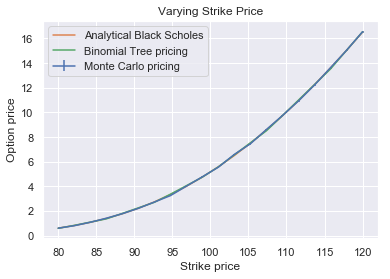

In [51]:
#different strike price with the number of paths for the MC method and steps for BT method to which they converged to less t
#than 0.01 of BS model
varying_K = np.linspace(80, 120, 20)
  
MC_price_P_varying_K = []
MC_price_P_varying_K_std_errors = []
BS_price_P_varying_K = []
BT_price_P_varying_K = []
for i in range(len(varying_sigma)):
    print(i)
    MC_price_P = MC_option_pricer.putMCPricer(stock_price_T0,varying_K[i],sigma ,T,r,number_paths_converged, seed)
    BS_price_P = black_scholes.putBlackScholes(stock_price_T0,T,r,varying_K[i],sigma)
    tree = european_binomial_tree.buildTree(stock_price_T0, sigma, T, stop_step)
    BT_price_P = european_binomial_tree.valueEuropeanOptionMatrix(tree, T, r, varying_K[i],stop_step, sigma, option_type)
    MC_price_P_varying_K.append(MC_price_P[0])
    MC_price_P_varying_K_std_errors.append(MC_price_P[1])
    BS_price_P_varying_K.append(BS_price_P)
    BT_price_P_varying_K.append(BT_price_P[0][0])
    
plt.errorbar(varying_K,MC_price_P_varying_K, MC_price_P_varying_K_std_errors, label='Monte Carlo pricing')
plt.plot(varying_K,BS_price_P_varying_K, label='Analytical Black Scholes')
plt.plot(varying_K,BT_price_P_varying_K, label='Binomial Tree pricing')
plt.xlabel('Strike price')
plt.ylabel('Option price')
plt.title('Varying Strike Price')
plt.legend()
plt.show()

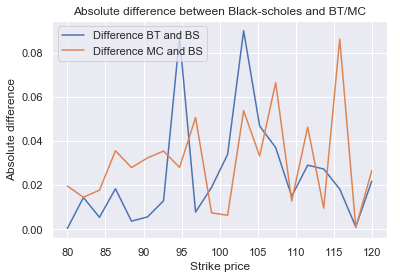

In [52]:
MC_price_P_varying_K_array = np.array(MC_price_P_varying_K)
BS_price_P_varying_K_array = np.array(BS_price_P_varying_K)
BT_price_P_varying_K_array = np.array(BT_price_P_varying_K)

difference_MC_BS2 = abs(MC_price_P_varying_K_array - BS_price_P_varying_K_array)
difference_BT_BS2 = abs(BS_price_P_varying_K_array - BT_price_P_varying_K_array)

plt.plot(varying_K,difference_MC_BS2, label='Difference BT and BS')
plt.plot(varying_K,difference_BT_BS2, label='Difference MC and BS')
plt.xlabel('Strike price')
plt.ylabel('Absolute difference')
plt.title('Absolute difference between Black-scholes and BT/MC')
plt.legend()
plt.show()